# reaching_go_spout_bar_nov22

Quick analysis of instrumental reaching

In [1]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *
from trialexp.process.pycontrol_utils import *
import seaborn as sns


### Variables
- This is where you specify your variable for folders etc.

In [30]:
# Only analyze an experimental session

pycontrol_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol'

# Filename only used for single file analysis, which is now possible but not the default mode
filename = r'\kms064-2023-02-06-094431.txt'

filepath = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\kms064-2023-02-02-111805.txt'

tasks_params_file = r'C:\Users\phar0732\Documents\GitHub\trialexp\params\tasks_params.csv'

trial_window = [-2000, 8000]


### Create an experiment object


### Get the data and metadata about behaviour with old methds

In [33]:
#Create experiment object
exp_cohort = Experiment(pycontrol_dir, update = True) #TODO

#Get experiment processed by trial
exp_cohort.process_exp_by_trial(trial_window = trial_window, tasksfile = tasks_params_file)

print(f'\nNumber of sessions: {len(exp_cohort.sessions)}')

file too short to process (likely aborted session):                 64 2023-02-03 15:57:01 reaching_go_spout_bar_nov22
The following sessions will be removed for lack of trials:
Deleting:  64 2023-02-03 15:57:01 reaching_go_spout_bar_nov22

Number of sessions: 16


In [34]:
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'hold_for_water', 'success': True}

# conditions_dict2 = {'trigger': 'hold_for_water', 'success': False, 'hold_timer': True}

conditions_dict2 = {'trigger': 'hold_for_water', 'waiting_for_spout': False}

# conditions_dict2 = {'trigger': 'hold_for_water', 'spout':False, 'valid': True, 'busy_win_timer': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
conditions_list = [conditions_dict1, conditions_dict2]
# Aliases for conditions
cond_aliases = ['Go - hold hit', 'Go - aborted']
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]
groups = None



Session: 64 2023-02-02 11:18:05 reaching_go_spout_bar_nov22
Number of trials: 29


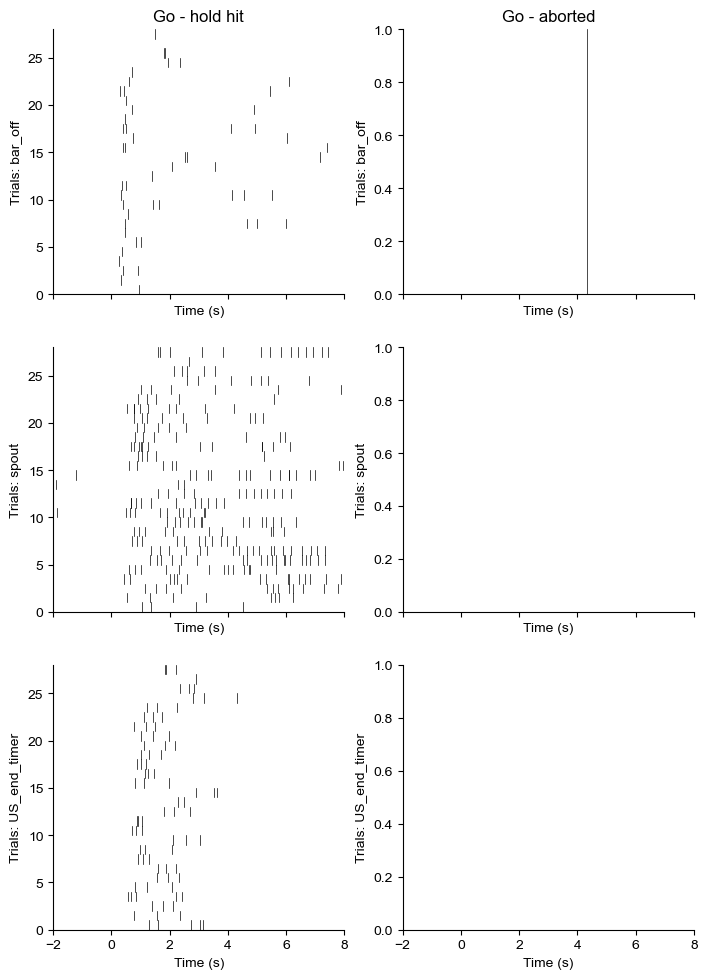


Session: 58 2023-02-02 11:28:09 reaching_go_spout_bar_nov22
Number of trials: 22


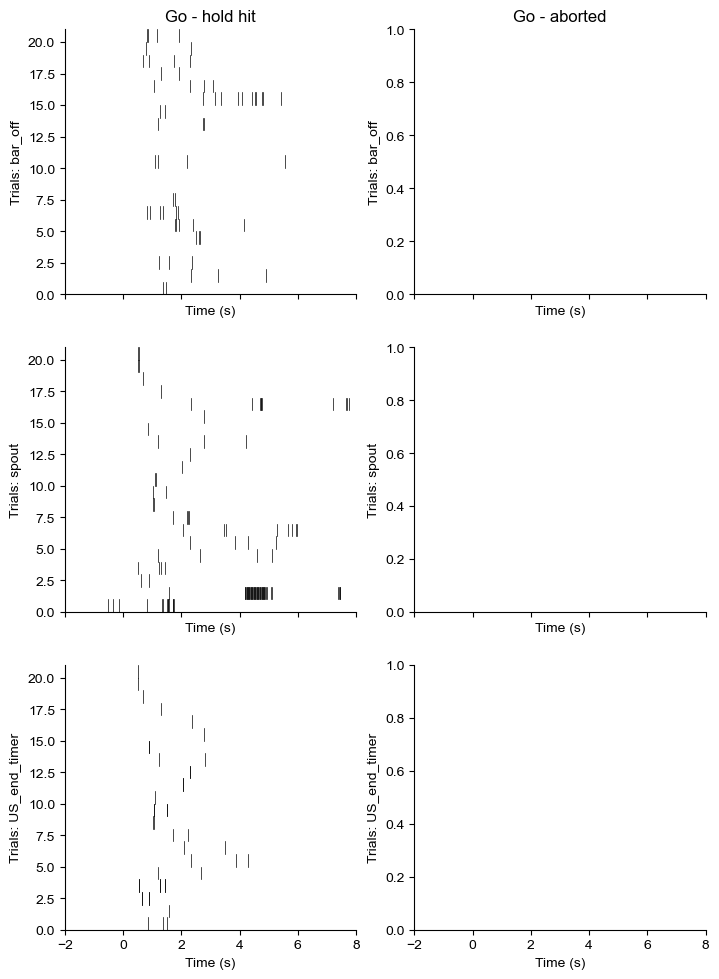


Session: 63 2023-02-02 11:28:09 reaching_go_spout_bar_nov22
Number of trials: 13


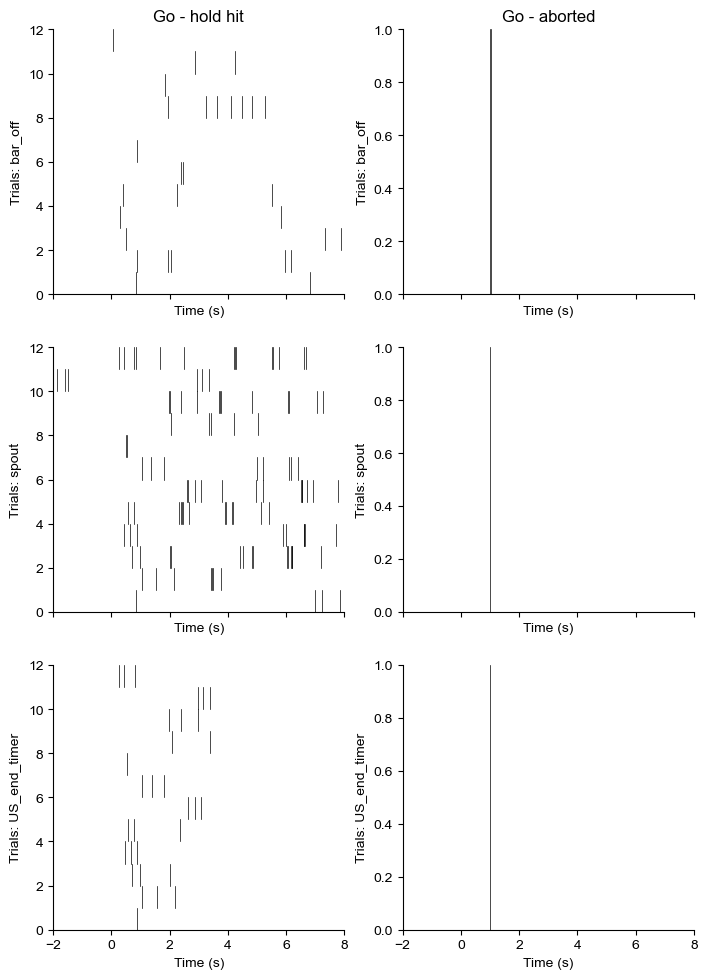


Session: 64 2023-02-03 15:53:28 reaching_go_spout_bar_nov22
Number of trials: 3


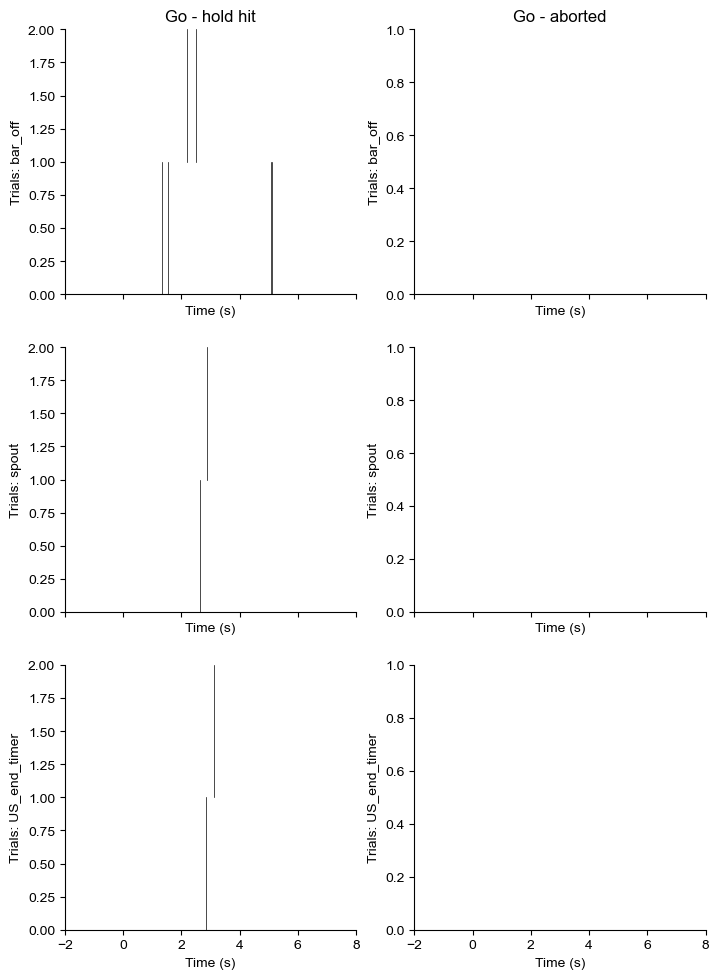


Session: 64 2023-02-03 15:57:49 reaching_go_spout_bar_nov22
Number of trials: 29


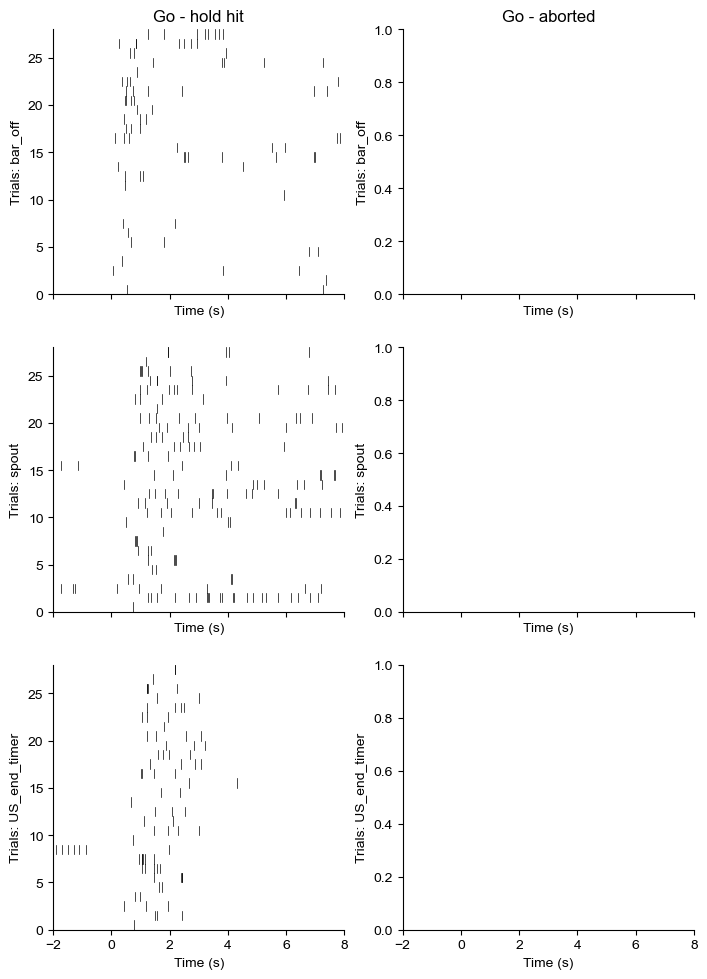


Session: 58 2023-02-03 15:58:23 reaching_go_spout_bar_nov22
Number of trials: 7


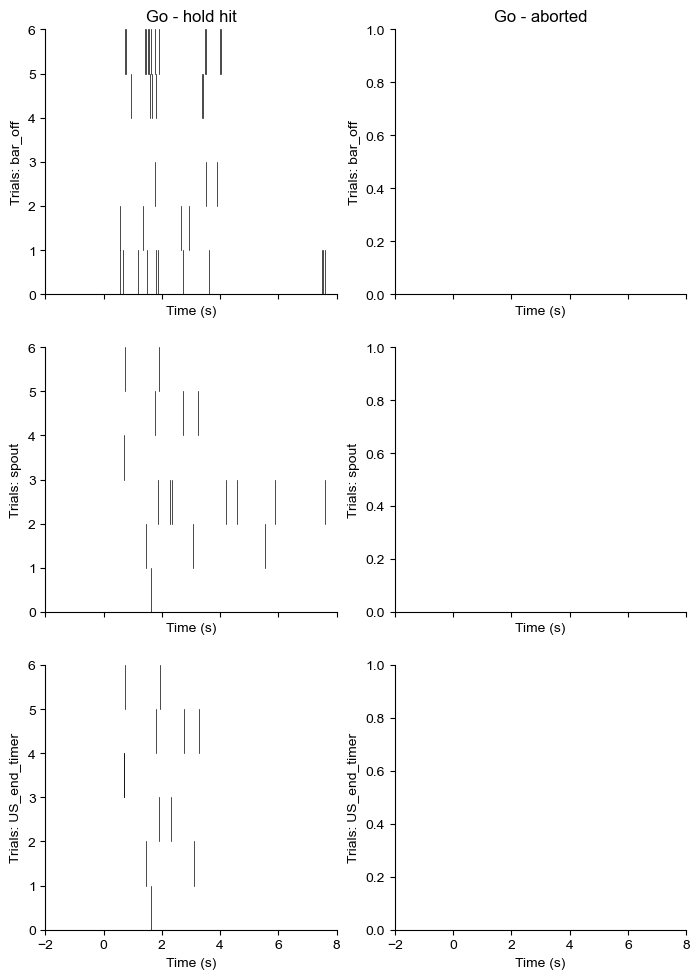


Session: 64 2023-02-06 09:44:31 reaching_go_spout_bar_nov22
Number of trials: 32


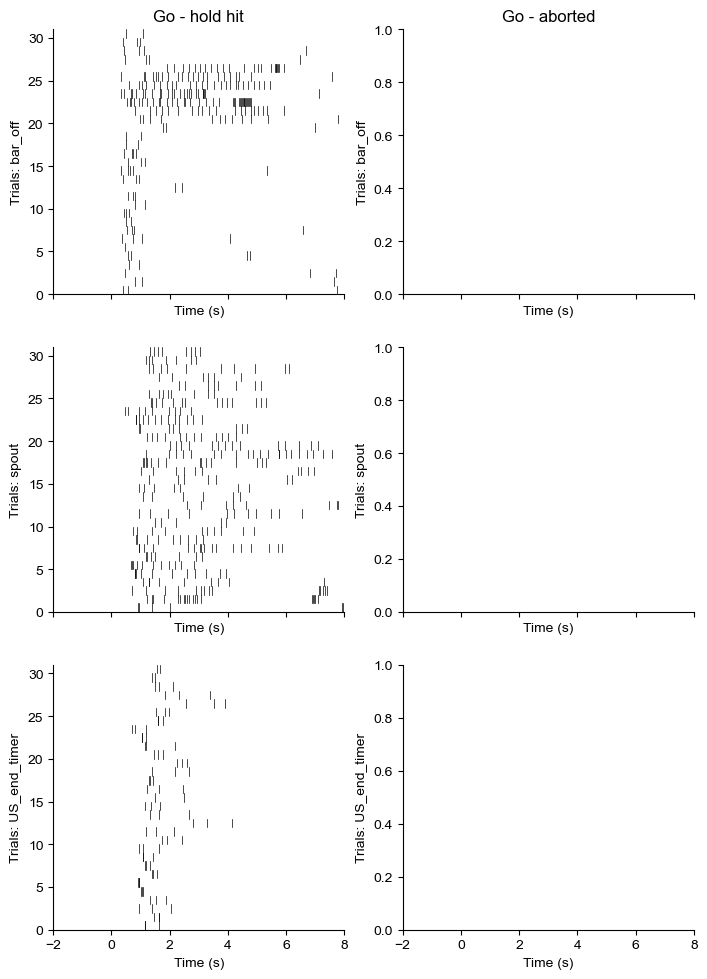


Session: 64 2023-02-07 10:20:29 reaching_go_spout_bar_nov22
Number of trials: 120


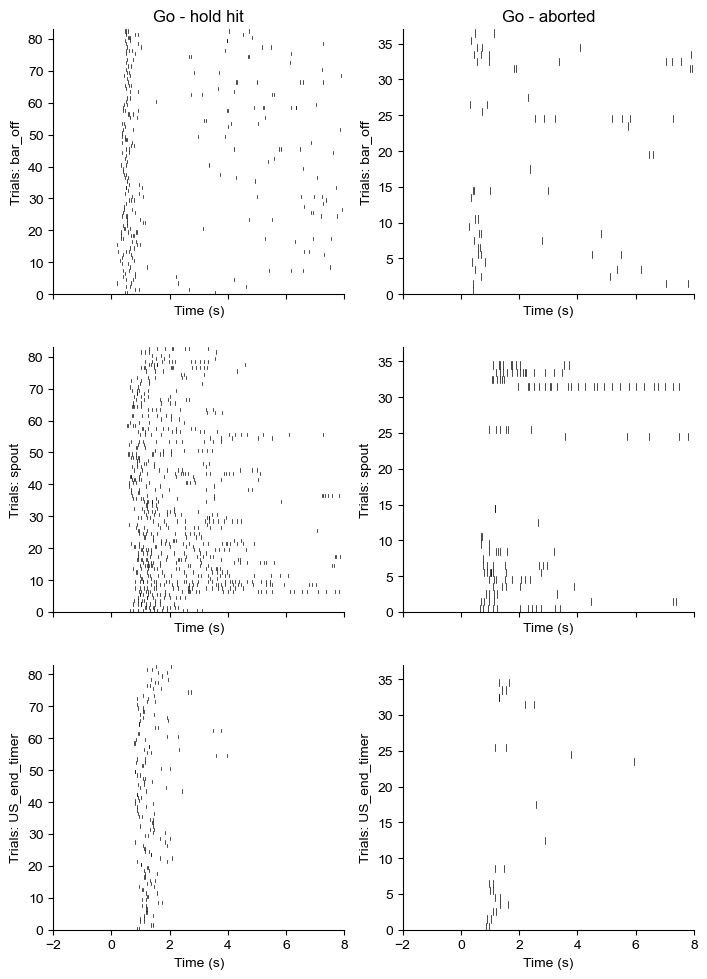


Session: 64 2023-02-08 10:04:49 reaching_go_spout_bar_nov22
Number of trials: 92


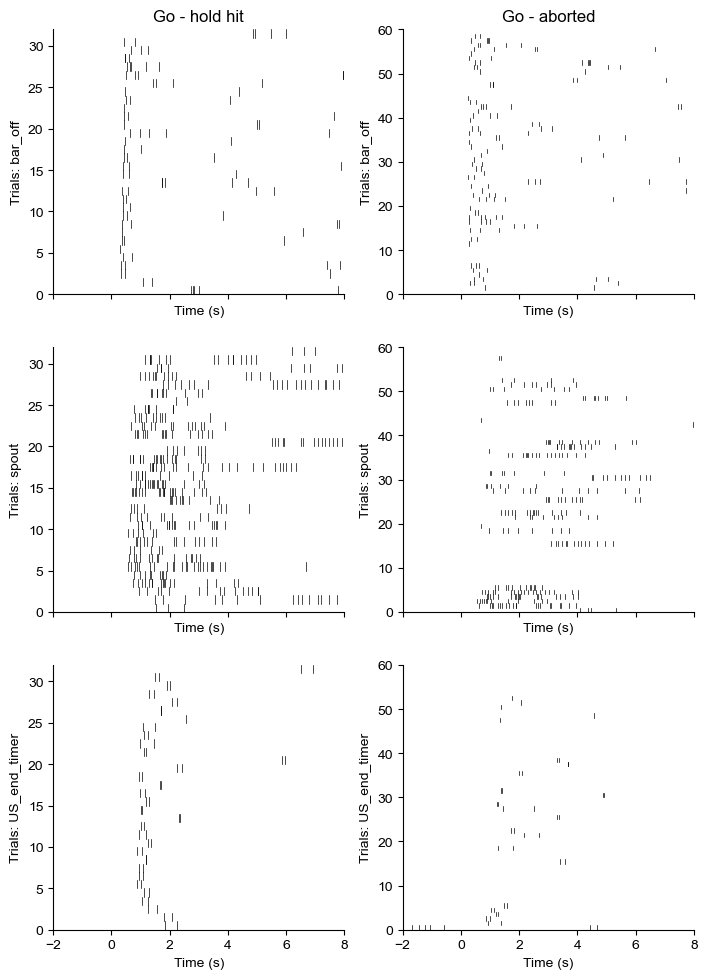


Session: 62 2023-02-08 15:22:34 reaching_go_spout_bar_nov22
Number of trials: 93


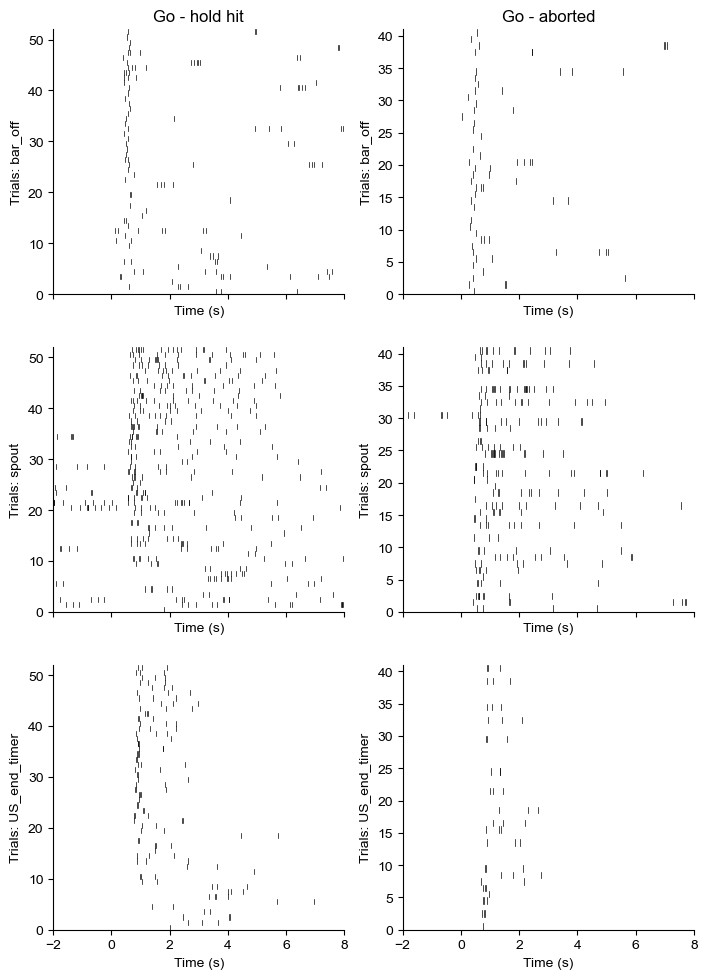


Session: 62 2023-02-09 10:02:52 reaching_go_spout_bar_nov22
Number of trials: 108


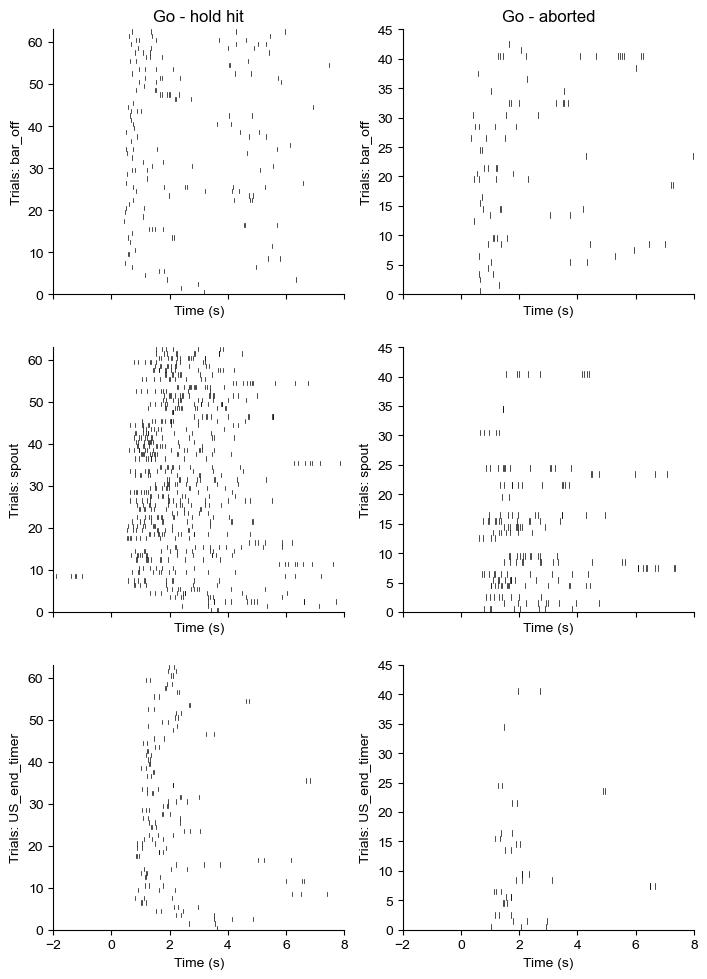


Session: 63 2023-02-09 10:56:36 reaching_go_spout_bar_nov22
Number of trials: 59


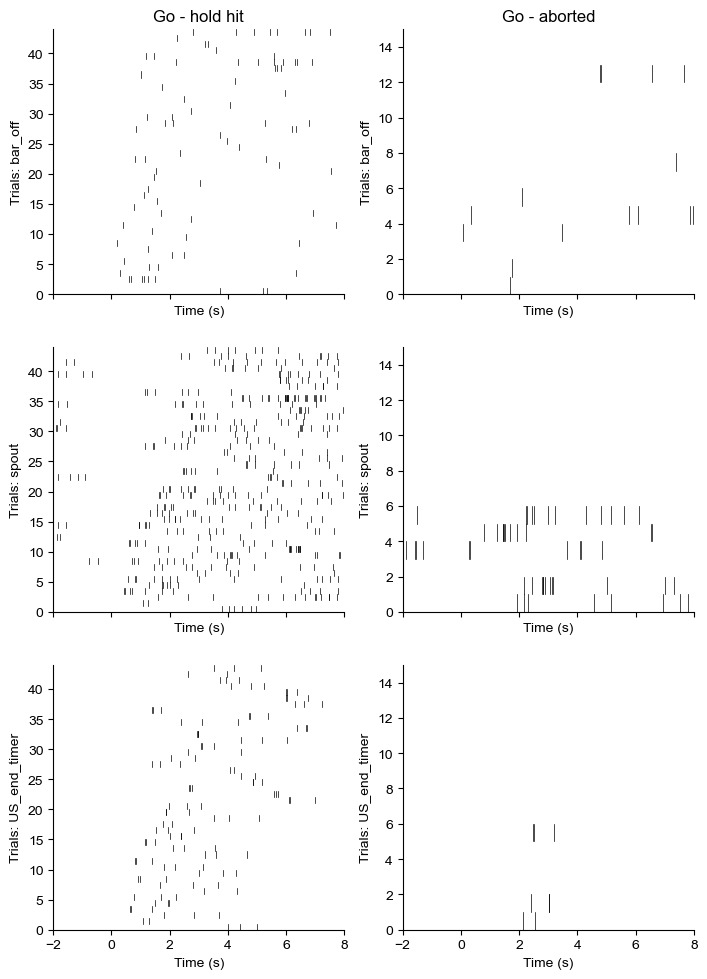


Session: 64 2023-02-10 11:55:09 reaching_go_spout_bar_nov22
Number of trials: 62


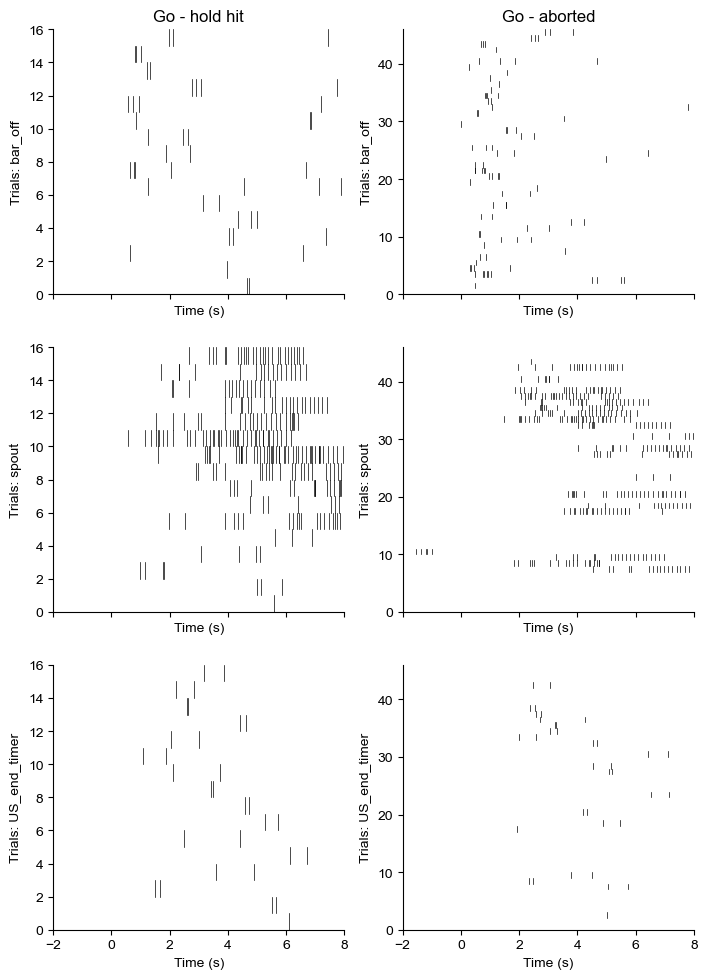


Session: 62 2023-02-10 12:22:10 reaching_go_spout_bar_nov22
Number of trials: 93


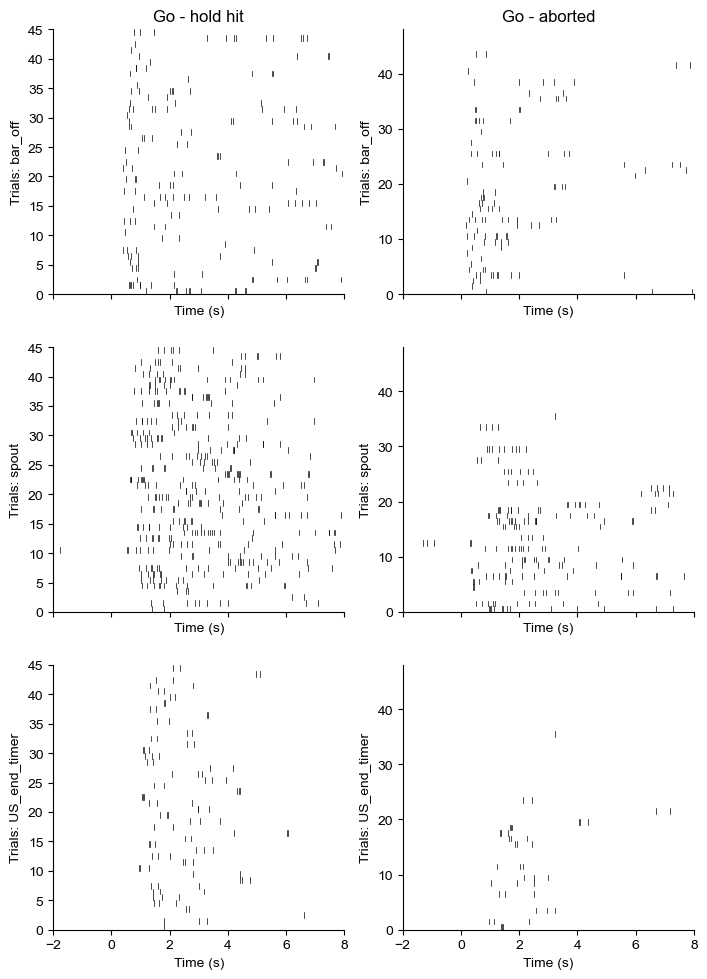


Session: 64 2023-02-10 12:36:20 reaching_go_spout_bar_nov22
Number of trials: 35


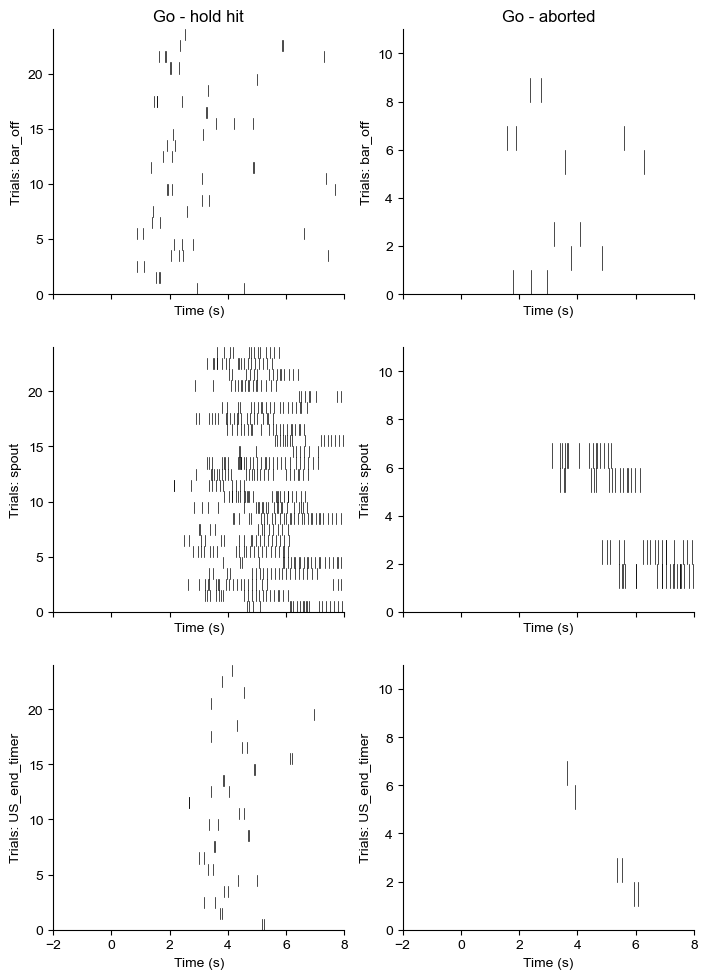


Session: 63 2023-02-10 15:29:38 reaching_go_spout_bar_nov22
Number of trials: 35


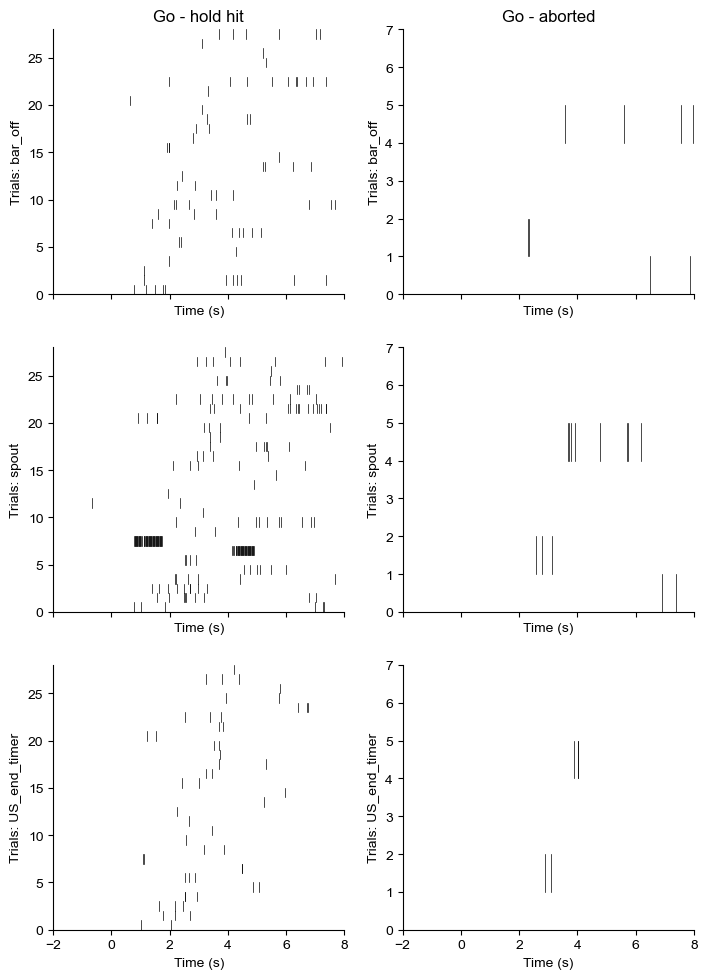

In [35]:
import copy
from matplotlib.pyplot import show

for session_idx, session in enumerate(exp_cohort.sessions):
    # make a copy of the experiment object
    exp_subset = copy.deepcopy(exp_cohort)
    # turn into an experiment with only one session
    exp_subset.sessions = [exp_subset.sessions[session_idx]]
    # extract an event dataset
    behav_events = exp_subset.behav_events_to_dataset(conditions_list = conditions_list, cond_aliases = cond_aliases, groups = groups)
    # Print some info about the session
    print(f'\nSession: {session.subject_ID} {session.datetime} {session.task_name}')
    print(f'Number of trials: {len(behav_events.data)}')
    # plot the raster
    behav_events.plot_raster(keys=['bar_off_trial_time','spout_trial_time','US_end_timer_trial_time'], separate=True)
    show()

# Analyze rewards

In [11]:
df_reward = df_events[df_events.event_name == 'US_delay_timer']

## Analyze the first spout time

In [15]:
df_first_spout = df_events[(df_events.state=='waiting_for_spout') & (df_events.event_name =='spout')].copy()
df_trial_start = df_events[(df_events.state=='waiting_for_spout') & (df_events.event_name =='state_change')].copy()
# assert len(df_first_spout) == len(df_trial_start)

df_first_spout['time_first_spout'] = (df_first_spout.time.values - df_trial_start.time.values)
df_first_spout.trial_number = df_first_spout.trial_number.astype(str) #hack to force seaborn to treat this as categoric variable

ValueError: operands could not be broadcast together with shapes (31,) (124,) 